<a href="https://colab.research.google.com/github/jasmine400/nlp-/blob/main/dbscan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy

def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.

    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.

    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """

    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.
    labels = [0]*len(D)

    # C is the ID of the current cluster.
    C = 0

    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the
    # cluster growth is all handled by the 'expandCluster' routine.

    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):

        # Only points that have not already been claimed can be picked as new
        # seed points.
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue

        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)

        # If the number is below MinPts, this point is noise.
        # This is the only condition under which a point is labeled
        # NOISE--when it's not a valid seed point. A NOISE point may later
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the
        # seed for a new cluster.
        else:
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)

    # All data has been clustered!
    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):



    labels[P] = C


    i = 0
    while i < len(NeighborPts):


        Pn = NeighborPts[i]


        if labels[Pn] == -1:
           labels[Pn] = C

        .
        elif labels[Pn] == 0:

            labels[Pn] = C

            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)


            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts

        i += 1




def regionQuery(D, P, eps):

    neighbors = []

    # For each point in the dataset...
    for Pn in range(0, len(D)):

        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)

    return neighbors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import make_moons
#moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples = 2000)
print(moons_X)
df = pd.DataFrame(data=moons_X, columns=["column1", "column2"])
my_labels = MyDBSCAN(moons_X, eps=0.5, MinPts=10)
print(my_labels)
print(len(my_labels))

[[ 1.71758991 -0.19646588]
 [ 0.11942576  0.02609178]
 [ 1.94799886  0.18172629]
 ...
 [ 0.15261916 -0.0309856 ]
 [ 0.86681052  0.49863767]
 [-0.49727411  0.86759349]]
[1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 

In [ ]:
a_set = set(my_labels)
clusters=len(a_set)
print(a_set)

{1, 2}


In [ ]:
df.insert(1,"cluster",my_labels, True)
print(df.head())

    column1  cluster   column2
0  1.717590        1 -0.196466
1  0.119426        1  0.026092
2  1.947999        1  0.181726
3 -0.937523        2  0.347924
4  0.905975        2  0.423331


In [ ]:
df_new1 = df[df['cluster'] == 1]
x1=list(df_new1['column1'])
print(x1)
y1=list(df_new1['column2'])
print(y1)

df_new2 = df[df['cluster'] == 2]
x2=list(df_new2['column1'])
print(x2)
y2=list(df_new2['column2'])
print(y2)


[1.7175899112397874, 0.11942575749618534, 1.9479988620291953, 0.2524525075716464, 1.751710201117993, 1.055005129584193, 1.995251918294099, 1.9375229220208274, 0.2503674465318174, 0.17681006354505469, 1.102026126963984, 1.8337556216091513, 1.999995055317446, 0.6683431674438609, 1.1643497025313059, 1.8302665232721207, 1.5376310974029872, 0.5582402171198169, 1.9908711975058635, 0.018947238263831934, 0.1803972720940884, 1.5742202635406233, 0.37055742073198406, 0.18220304328342218, 0.8480708753344841, 0.32527971580530735, 0.28680465743928985, 0.20832475652531457, 1.9602146853776894, 1.0172951933005772, 0.3183467031004671, 1.9200742345909911, 0.7282947268795872, 0.03070139433386454, 0.3853302462459076, 0.20449793491441004, 1.0801048857378068, 0.00024227986093938725, 1.7897500794403256, 1.5243072835572316, 1.6391669588329847, 0.817068802527613, 0.0004944279143784813, 1.1891108829779162, 0.21218289472091323, 0.9136274767854715, 1.7720744574600857, 0.08116224502380398, 1.8922168683569036, 0.256

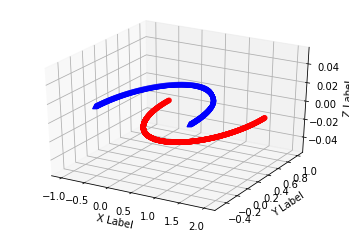

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, c='r', marker='o')
ax.scatter(x2, y2, c='b', marker='^')



ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/clustering
!ls

/content/gdrive/My Drive/Colab Notebooks/clustering
'CC GENERAL.csv'      dbscan.ipynb     k-means_clustering.ipynb
 clustering_2.ipynb   FLOWERDATA.txt   scatterolpt.ipynb
 dbscan_2.ipynb       k-means_3


In [ ]:
X = pd.read_csv('CC GENERAL.csv')
X = X.drop('CUST_ID', axis = 1)
X.fillna(method ='ffill', inplace = True)

In [ ]:
print(X.head())

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())
print(type(X_principal))

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544825
2  0.330633  0.268883
3 -0.481656 -0.097612
4 -0.563512 -0.482506
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X=np.array(X_principal)
print(X)

[[-0.48994912 -0.67997638]
 [-0.51909874  0.54482525]
 [ 0.3306331   0.26888281]
 ...
 [ 0.18881761 -0.24815508]
 [-0.31309304 -0.17111208]
 [ 0.01284086  0.09842242]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

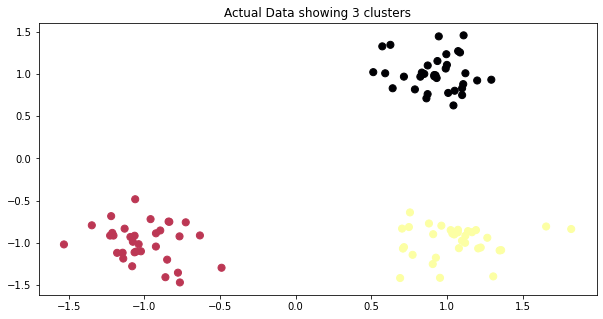

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=100, centers=centers,random_state=2,cluster_std=0.2)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 3 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno');

In [ ]:
print(type(X))
print(X)
print("-----------------------------")
df = pd.DataFrame(data=X, columns=["column1", "column2"])

<class 'numpy.ndarray'>
[[ 0.93729836  1.15420235]
 [-1.13065005 -0.83150874]
 [ 1.10057628  0.75094238]
 [-0.86097608 -1.40669331]
 [ 1.0730107  -0.84518359]
 [ 0.94618861  1.44627336]
 [ 0.57276078  1.32805416]
 [-0.840164   -0.74747727]
 [ 0.59193539  1.0092511 ]
 [ 1.07930403 -1.06292349]
 [ 1.22357735 -1.05484842]
 [ 1.82173852 -0.83577582]
 [ 1.10037144  0.83115726]
 [ 1.12202882 -0.91530062]
 [ 0.70932713 -1.06760356]
 [ 1.30635206 -1.39716915]
 [-1.06500993 -1.1120469 ]
 [-0.8350594  -0.75035742]
 [-1.09240107 -0.9298223 ]
 [ 0.86446488  0.71211219]
 [-0.72655292 -0.75642287]
 [-0.92362675 -0.88674491]
 [ 0.95435049 -1.41392245]
 [ 1.11029081  1.4584416 ]
 [ 1.19215639 -0.84832593]
 [ 0.9961739   1.23500024]
 [ 0.90633075 -1.25094406]
 [ 0.71575655  0.96930096]
 [-1.0763033  -0.9867022 ]
 [ 1.09958803 -0.97469916]
 [ 1.07182667 -0.87555592]
 [-1.14385077 -1.11668292]
 [ 0.78840956  0.81819848]
 [ 0.99208595  1.06520069]
 [ 0.93223561  0.95276319]
 [ 1.00000195  1.10847051]
 [ 0

In [ ]:
my_labels = MyDBSCAN(X, eps=0.5, MinPts=10)

In [ ]:
print(my_labels)
print(len(my_labels))

[1, 2, 1, 2, 3, 1, 1, 2, 1, 3, 3, -1, 1, 3, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 1, 3, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 3, 2, 3, 1, 3, 1, 1, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 1, 3]
100


In [ ]:
a_set = set(my_labels)
clusters=len(a_set)
print(a_set)

{1, 2, 3, -1}


In [ ]:
a_set = set(my_labels)
clusters=len(a_set)
print(a_set)

{1, 2}


In [ ]:
X_principal.insert(1,"cluster",my_labels, True)
print(X_principal.head())

In [ ]:
print(my_labels)
for i in my_labels:
  if i==3:
    print("yes")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 0.84022039  1.14802236]
 [-1.15474834 -1.2041171 ]
 [ 0.67863613  0.72418009]
 ...
 [ 0.26798858 -1.27833405]
 [-0.88628813 -0.30293249]
 [ 0.60046048 -1.29605472]]


In [ ]:
X_principal.insert(1,"cluster",my_labels, True)

In [ ]:
print(X_principal.head())

         P1  cluster        P2
0 -0.489949        1 -0.679976
1 -0.519099        1  0.544825
2  0.330633        1  0.268883
3 -0.481656        1 -0.097612
4 -0.563512        1 -0.482506


In [ ]:
df_new0 = X_principal[X_principal['cluster'] == 0]
x0=list(df_new0['P1'])
print(x0)
y0=list(df_new0['P2'])
print(y0)


[]
[]


In [ ]:
df_new1 = X_principal[X_principal['cluster'] == 1]
x1=list(df_new1['P1'])
print(x1)
y1=list(df_new1['P2'])
print(y1)
print(len(x1))
print(len(y1))


[-0.4899491168970349, -0.5190987395414417, 0.33063310179270455, -0.48165622764846294, -0.5635116230721937, 0.336075554550618, 0.7561779712089267, 0.5764728144551733, -0.18503140859912673, -0.2173627063109349, 0.6054318865663052, -0.3343861534189124, 0.8859031151229152, 0.7665621493574133, -0.7361762139035464, 0.06395082358665474, -0.5676588349046685, -0.02664777441187796, 0.2948819430104294, 0.2949618517817258, 0.10466768370733498, 0.5931735383373509, 0.6010077824538532, 0.27745486335489844, -0.6627927517342863, 0.5813495841059161, -0.7490497709934054, 0.5145275623642628, -0.14877442228114954, -0.0731213664594964, 0.3312728928482943, 0.7784886103806674, -0.402198806122385, 0.3214244089283623, 0.2644867715562797, -0.7112896279209244, -0.4474551984594567, 0.4986035095330006, -0.5164670852158273, -0.12321502119490717, -0.7228733238803984, 0.1652268354192635, -0.540543642297025, -0.7375194467026422, 0.6852765288530931, -0.43268057534367366, -0.24052789584472323, -0.7261122335547869, 0.8663

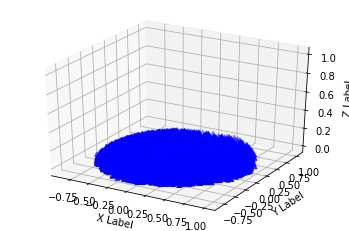

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0, y0, c='r', marker='o')
ax.scatter(x1, y1, c='b', marker='^')



ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
import numpy

def MyDBSCAN(D, eps, MinPts):


    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.
    labels = [0]*len(D)

    # C is the ID of the current cluster.
    C = 0

    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the
    # cluster growth is all handled by the 'expandCluster' routine.

    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):

        # Only points that have not already been claimed can be picked as new
        # seed points.
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue

        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)

        # If the number is below MinPts, this point is noise.
        # This is the only condition under which a point is labeled
        # NOISE--when it's not a valid seed point. A NOISE point may later
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the
        # seed for a new cluster.
        else:
           # Get the next cluster label.
           C += 1

           # Assing the label to our seed point.
           labels[P] = C

           # Grow the cluster from the seed point.
           growCluster(D, labels, P, C, eps, MinPts)

    # All data has been clustered!
    return labels


def growCluster(D, labels, P, C, eps, MinPts):


    # SearchQueue is a FIFO queue of points to evaluate. It will only ever
    # contain points which belong to cluster C (and have already been labeled
    # as such).
    #
    # The points are represented by their index values (not the actual vector).
    #
    # The FIFO queue behavior is accomplished by appending new points to the
    # end of the list, and using a while-loop rather than a for-loop.
    SearchQueue = [P]

    # For each point in the queue:
    #   1. Determine whether it is a branch or a leaf
    #   2. For branch points, add their unclaimed neighbors to the search queue
    i = 0
    while i < len(SearchQueue):

        # Get the next point from the queue.
        P = SearchQueue[i]

        # Find all the neighbors of P
        NeighborPts = regionQuery(D, P, eps)

        # If the number of neighbors is below the minimum, then this is a leaf
        # point and we move to the next point in the queue.
        if len(NeighborPts) < MinPts:
            i += 1
            continue

        # Otherwise, we have the minimum number of neighbors, and this is a
        # branch point.

        # For each of the neighbors...
        for Pn in NeighborPts:

            # If Pn was labelled NOISE during the seed search, then we
            # know it's not a branch point (it doesn't have enough
            # neighbors), so make it a leaf point of cluster C and move on.
            if labels[Pn] == -1:
               labels[Pn] = C
            # Otherwise, if Pn isn't already claimed, claim it as part of
            # C and add it to the search queue.
            elif labels[Pn] == 0:
                # Add Pn to cluster C.
                labels[Pn] = C

                # Add Pn to the SearchQueue.
                SearchQueue.append(Pn)

        # Advance to the next point in the FIFO queue.
        i += 1

    # We've finished growing cluster C!


def regionQuery(D, P, eps):

    neighbors = []

    # For each point in the dataset...
    for Pn in range(0, len(D)):

        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)

    return neighbors